<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: machine learning practice with scikit-learn

---

We are going to use datasets about wine.

There are two datasets; one for white wines, one for red wines.

For information about the dataset look here:

- [https://archive.ics.uci.edu/ml/datasets/wine+quality](https://archive.ics.uci.edu/ml/datasets/wine+quality)
- [Data description](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality.names)

# Part 1: Regression

We will focus on **white wines only** for this part.

We will attempt to predict white wine (perceived) **quality** using information about the wine.

#### 1: Read in the white wine data and perform exploratory data analysis on it. Be sure to look for things like:

- missing values
- strange values
- relationships between features and the target (quality)

If you have trouble reading the file in, a good idea is to open it in a simple text editor to investigate its formatting!

The dataset is in the data folder, within unit projects.

# 1a: Dependencies & Citations

In [1]:
#not massively efficient use of memory to move all of this into the name space, but i prefer to declare 
#dependencies explicitly and do so up here at the top assuming someone else will need to read or use my code one day

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
#haven't pulled sklearn up here as it's such a large library

%matplotlib inline

#Data Source Citation
  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

In [2]:
!pwd #the ! allows jupyter to behave like a terminal. in this case, we're locating 'where' this notebook is 

/Users/garysanders/Desktop/my_repo/unit_projects


# 1b: Data Acquisition and EDA

In [3]:
white = pd.read_csv('data/winequality-white.csv',sep=';')

In [4]:
white.shape #almost 5k rows and 12 columns (including df index). matches data documentation

(4898, 12)

In [5]:
white.head() #eyeballing that the dataframe has loaded as it shoud have, and that the data looks 
#correctly separated across columns - i'm happy that it does

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
white.dtypes #a dataframe full of numeric values and all look as they 'should' based on the .describe

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [7]:
white.describe() #i don't have enough domain knowledge on wine to determine whether any of the values in 
#the .describe() seem erroneous - I can't tell if the outliers look appropriate or not for example. In 
#the absence of finding a domain expert to help with the interpretation, I'll let the accuracy of the model 
#show me the #ay. Instead I'm going to look for gaps in the data, or zero values as that'll harm model accuracy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [8]:
white.isnull().sum() #great news! no null values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
#given quality is our target variable, taking a look at the data grouped by that target to make sure i understand the 
#distribution of that target variable. there are remarkably few outliers (in this case those outliers would indicate 
#high or low quality scores. The absence of high / low outliers gives me some concern about the ability of 
#the model to generalise, as i've so few examples of the observations I want: 3 (bad) and 9 (good) quality white 
#wines. I might have to sample up or down, let's see...
white.groupby(['quality']).count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,20,20,20,20,20,20,20,20,20,20,20
4,163,163,163,163,163,163,163,163,163,163,163
5,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457,1457
6,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198,2198
7,880,880,880,880,880,880,880,880,880,880,880
8,175,175,175,175,175,175,175,175,175,175,175
9,5,5,5,5,5,5,5,5,5,5,5


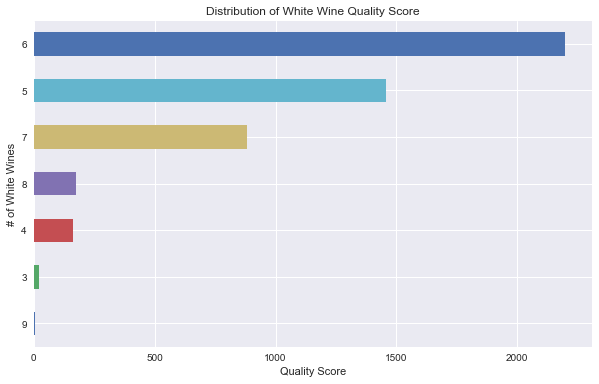

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

white['quality'].value_counts().sort_values(ascending=True).plot(kind="barh", ax=ax)

ax.set_title("Distribution of White Wine Quality Score")
ax.set_ylabel("# of White Wines")
ax.set_xlabel("Quality Score")

plt.show()

#hmmm. almost no outlier data on quality scores 3 and 9. let's see if there's enough for a good model

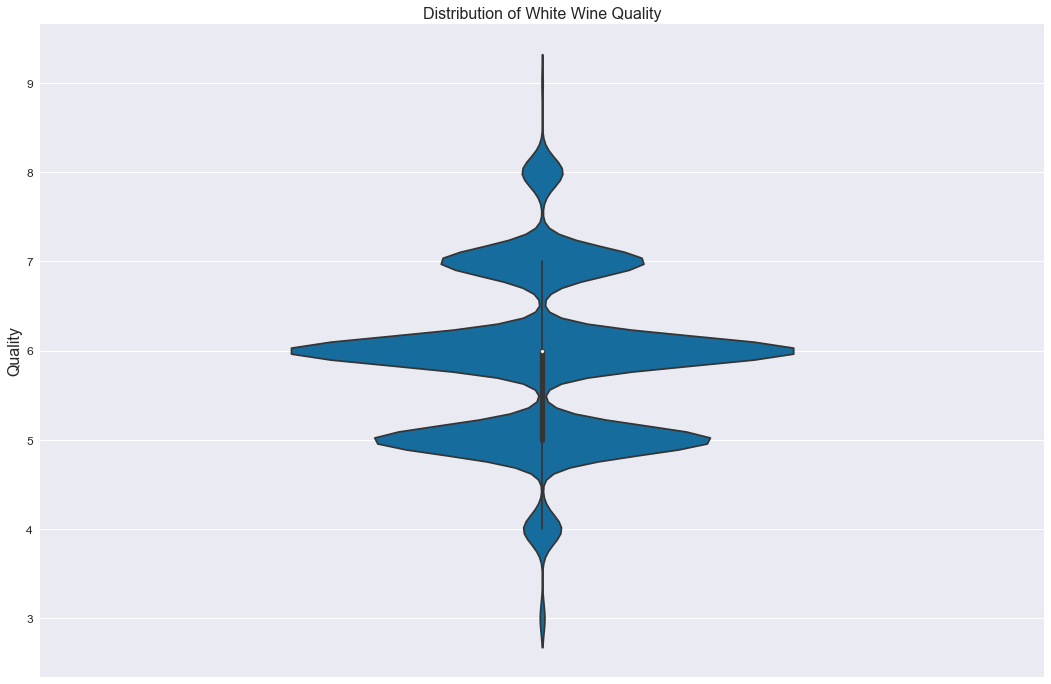

In [11]:
plt.subplots(figsize=(18,12))

bplot = sns.violinplot(y='quality', 
                 data=white, 
                 width=0.5,
                 palette="colorblind")

bplot.axes.set_title("Distribution of White Wine Quality",
                    fontsize=16)
 
bplot.set_ylabel("Quality",
                fontsize=16)
 
bplot.tick_params(labelsize=12)

#selected a violinplot to visualise both the distrbution of the (numerical) quality variable, and to get an 
#intuitive sense of the observation 'density'

In [12]:
white2 = white.set_index('quality')

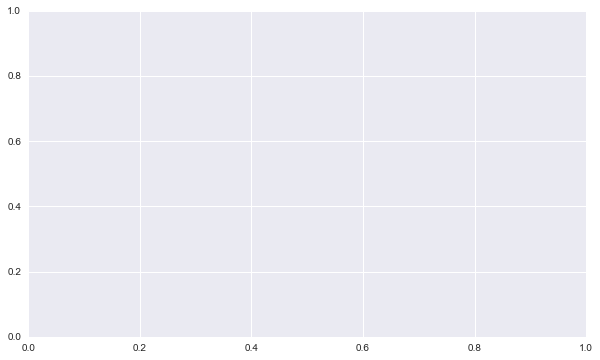

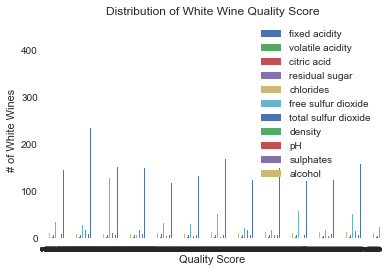

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

field = "quality"
order = [3,4,5,6,7,8,9]
ax = white2.loc[order].plot(kind="bar")

ax.set_title("Distribution of White Wine Quality Score")
ax.set_ylabel("# of White Wines")
ax.set_xlabel("Quality Score")

plt.show()

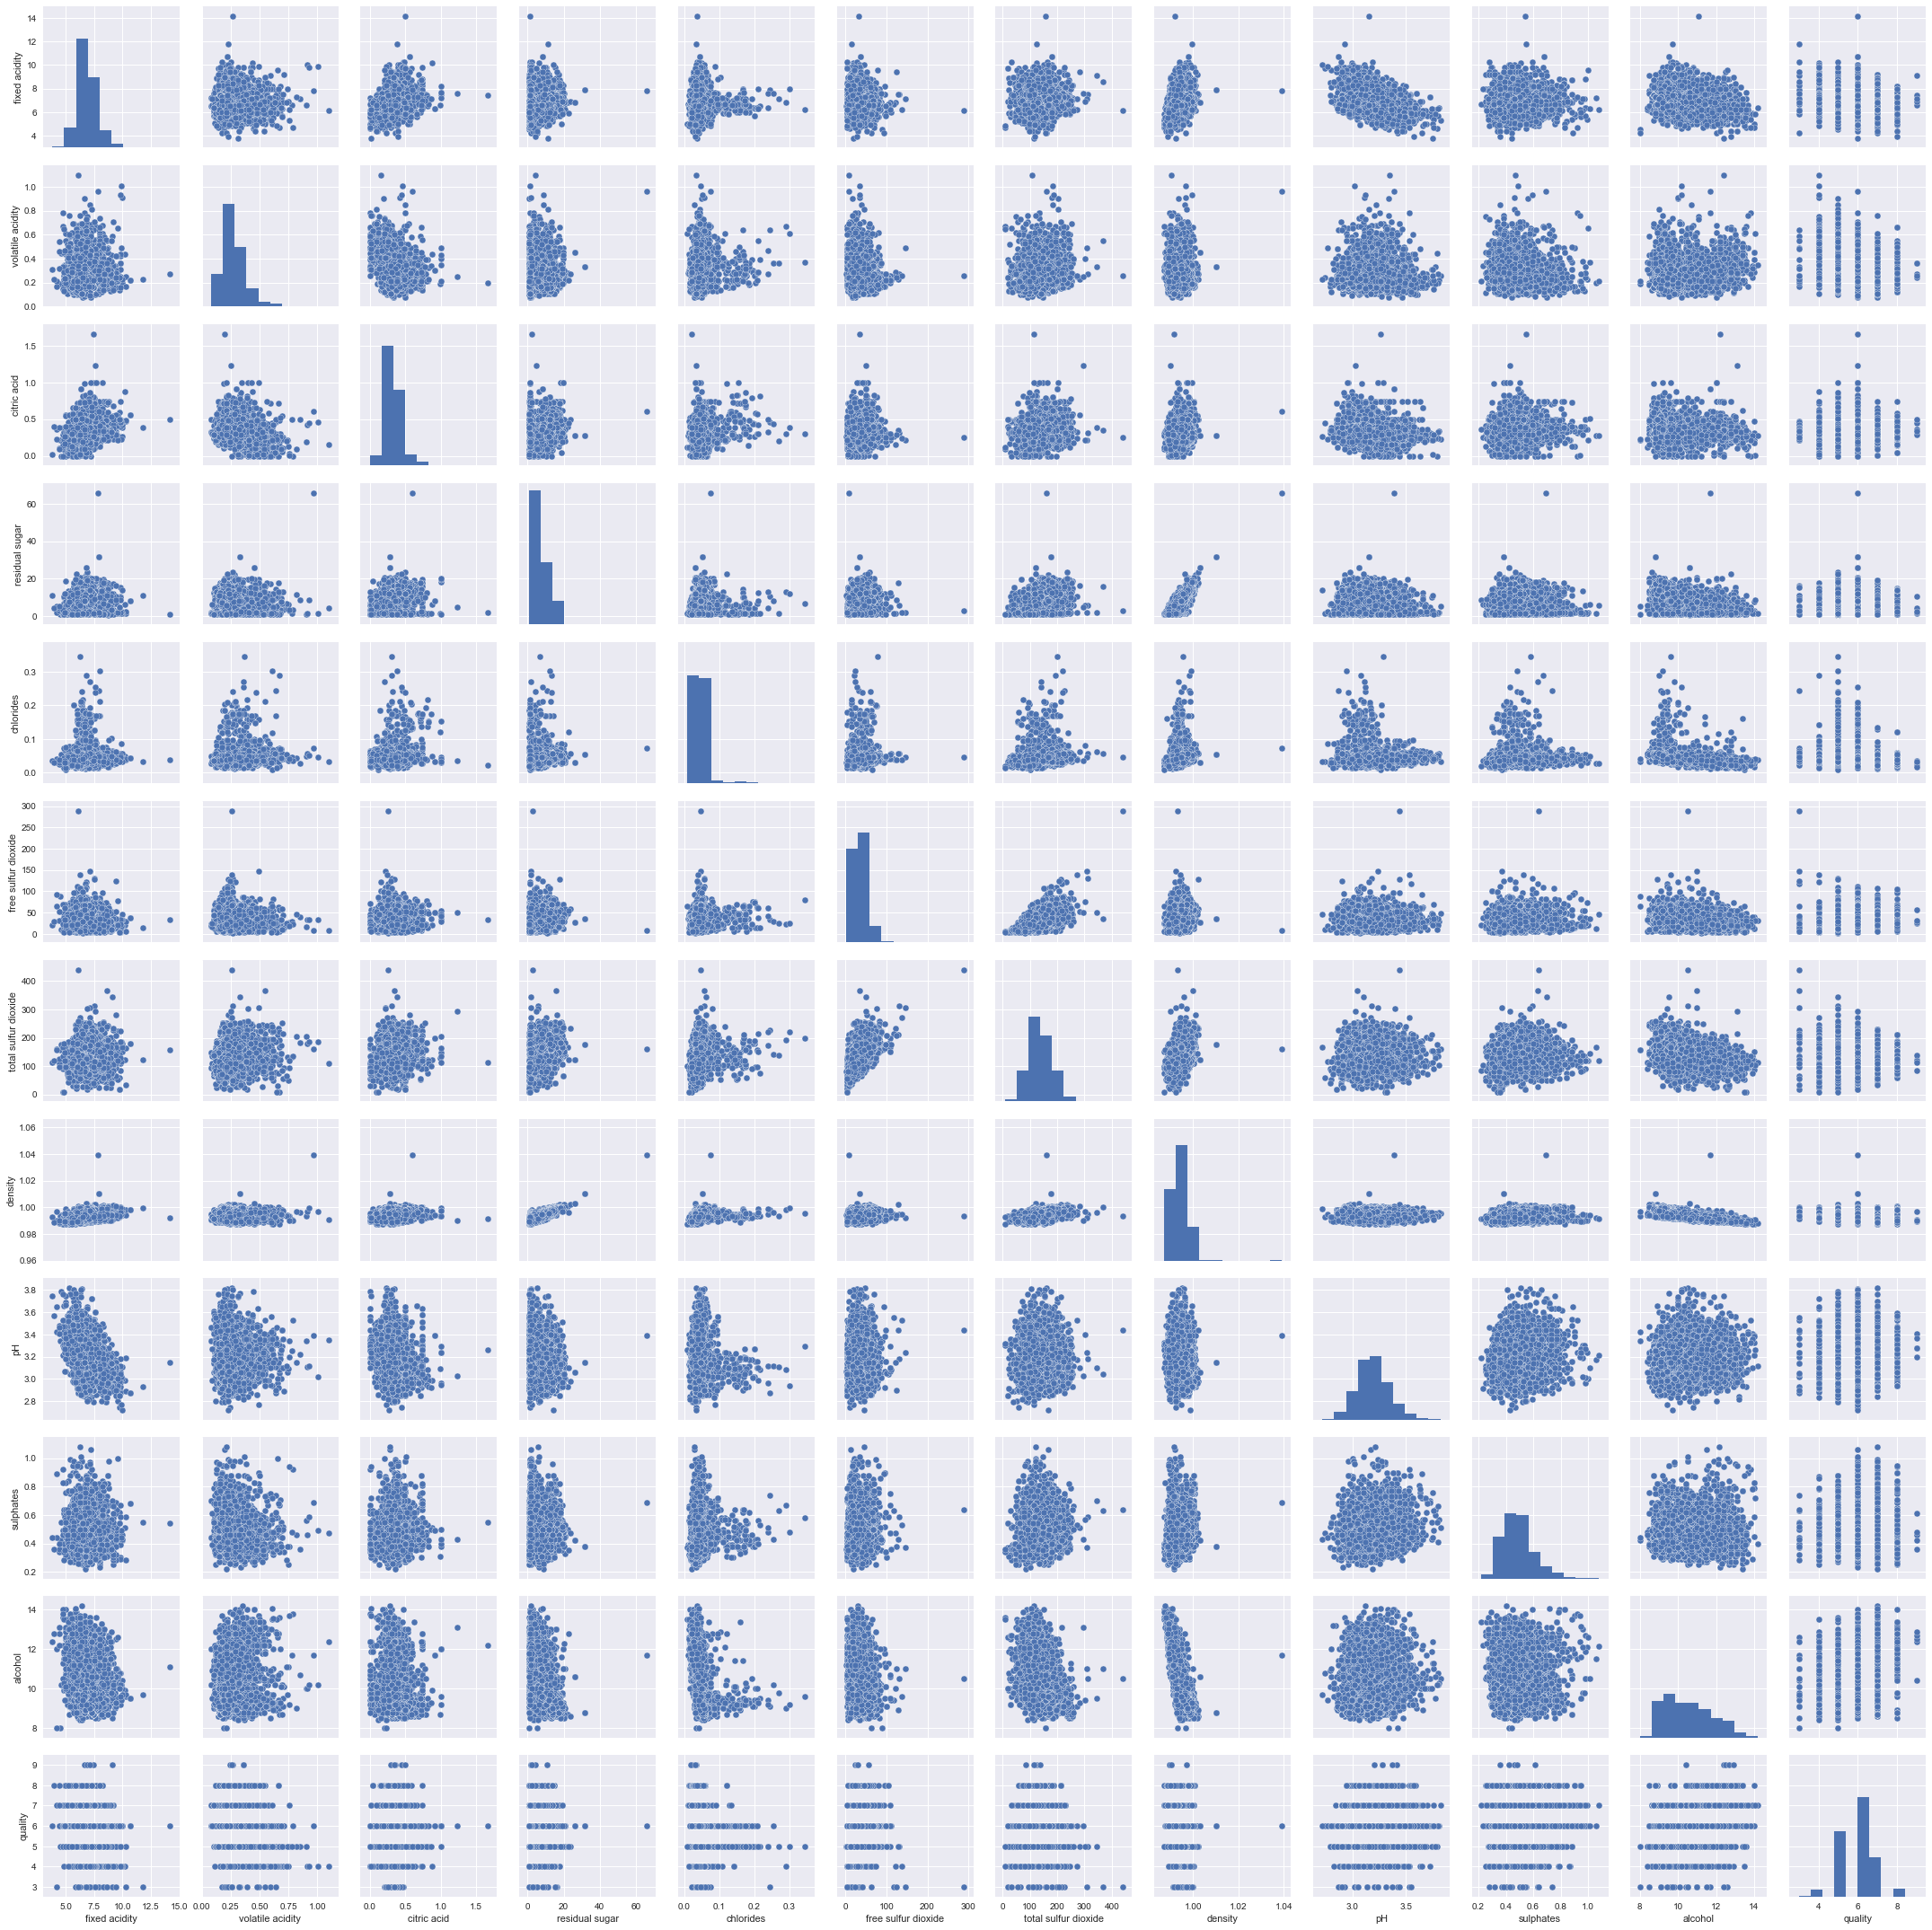

In [14]:
#taking a look at the data via plots. hmmm, given the clustered patterns on some of the pairplots and the 
#warnings in the data dictionary about multi-collinearity, I'll tread carefully
sns.pairplot(white)

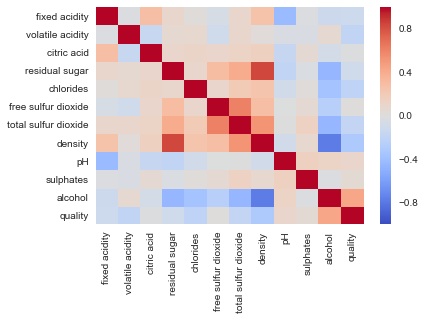

In [15]:
# moving from global level pairplots to a correlation matrix, to see if there's any standout predictive atrributes
sns.heatmap(white.corr(),
            vmin=-1,
            vmax=1,
            center=0,
            cmap="coolwarm");

#strongest correlation with quality seems to be alcohol, sulphates and ph

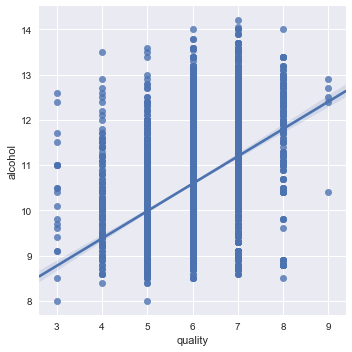

In [16]:
#double checking on those correlations. this seems pretty strong

sns.lmplot ('quality','alcohol',white);

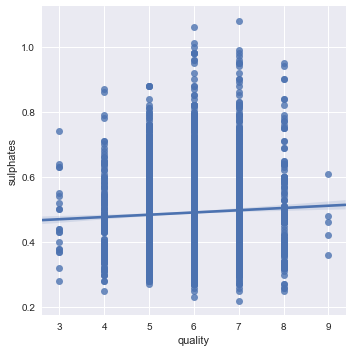

In [17]:
#double checking on those correlations. not much of a correlation here

sns.lmplot ('quality','sulphates',white);

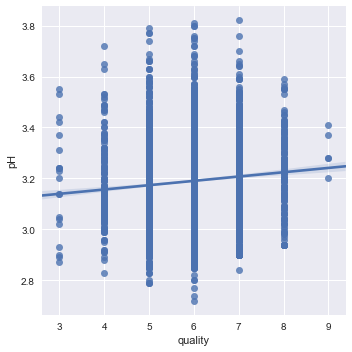

In [18]:
#double checking on those correlations. this seems pretty strong (it might be colinearity...does 
#the amount of alcohol affect pH?)

sns.lmplot ('quality','pH',white);

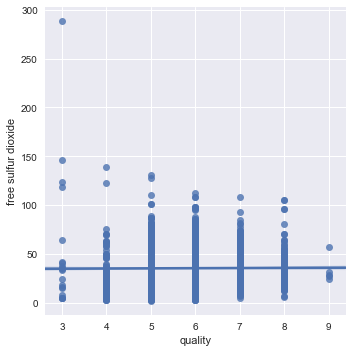

In [19]:
#double checking on those correlations. this is a weird pattern. does seem to be a decline in free sulphur 
#dioxide as quality increases, but there's not a statistical relationship - it's a flatine

sns.lmplot ('quality','free sulfur dioxide',white);

# 1c. Model Development & Regularisation

### 2: Do a train-test split and choose 3 predictors to predict quality

Remember: we want to avoid testing on the final test set until the end.

In [20]:
#based on the EDA phase above, i've started with alcohol, pH and sulphates. I'm assuming i'll get to trial 
#a broader set of predictors as we go through

predictors = ["alcohol", "pH", "sulphates"]
target = ["quality"]

from sklearn.model_selection import train_test_split

X = white[predictors]
y = white[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=21) 
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

3673 1225
3673 1225


In [21]:
X.shape #checking I just have the 3 x columns in predictors

(4898, 3)

In [22]:
X.head()

,alcohol,pH,sulphates
0,8.8,3.00,0.45
1,9.5,3.30,0.49
2,10.1,3.26,0.44
3,9.9,3.19,0.40
4,9.9,3.19,0.40


In [23]:
y.head()

,quality
0,6
1,6
2,6
3,6
4,6


### 3: Fit a linear regression on the training set and examine your interecept and coefficients. What do they tell you?

In [24]:
#fitting the model to the training data
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print(model.intercept_, model.coef_)

[1.52803353] [[0.31586725 0.2589065  0.40810239]]


My Interpretation:

Even the worst white wine would have a quality score of 1.5 (I think I've drunk this wine before). For every increment
in the predictive variables, the following becomes true based on our training sample

- Every base point gain in Alcohol suggests a 0.3 improvement in white wine quality (this must be non-linear, as the extrapolation makes no sense beyond a certain alcohol level)
- For every base point increase in pH, quality improves by 0.25 points
- For each base point gain in the level of Sulphates, quality improves by 0.4 points

### Model Evaluation: Cross-Validation

In [26]:
from sklearn.model_selection import train_test_split, cross_val_score
model = LinearRegression()
cv_scores = cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error")
print (cv_scores*-1)

[0.62441124 0.64380613 0.63906606]


### 4: Obtain the average RMSE score across 10 folds of cross-validation. This should give you a better idea of your model's performance on new data. How does it compare to the RMSE calculated above?

In [27]:
#10 fold cross validation. note that I'm currently comparing mean squared error, not RMSE
from sklearn.model_selection import train_test_split, cross_val_score
model = LinearRegression()
cv10_scores = cross_val_score(model,X_train,y_train,scoring="neg_mean_squared_error",cv=10)
print (cv10_scores*-1)

[0.5934054  0.59355807 0.69582199 0.53583079 0.70582182 0.70908359
 0.60404743 0.61992606 0.68415172 0.61264856]


### Linear Regression Model Evaluation & Interpretation:

1. Firstly, good news. There's an opportunity for less error / greater accuracy in 3 of the 10 folds of the cross validation exercise, when compared to the initial 3-fold exercise
2. The spread between the MSE scores in each of the folds suggests that there's still a good deal of variation, which *might* imply that the model doesn't generalise as well as it could. Let's put more data (in the form of more features) through the model and see if doing so improves accuracy further, and can improve generalisation too

### 5: Now try using *all the features* with both a lasso and ridge regression. Obtain the best alpha values using grid search.

In [28]:
#bringing back in-line the original feature list
white.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [29]:
#firstly, building out a more fully featured dataset, and then doing the train/test split

predictors2 = ["alcohol", "pH", "sulphates","fixed acidity",
               "volatile acidity","citric acid","residual sugar",'chlorides',
               "free sulfur dioxide","total sulfur dioxide","density"]
target = ["quality"]

from sklearn.model_selection import train_test_split

X2 = white[predictors2]
y2 = white[target]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.25, random_state=21) #keeping the same random
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

3673 1225
3673 1225


In [30]:
X2.shape #double-checking my data

(4898, 11)

In [31]:
y2.shape #double-checking my data

(4898, 1)

In [32]:
X2.columns #still checking data

Index(['alcohol', 'pH', 'sulphates', 'fixed acidity', 'volatile acidity',
       'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density'],
      dtype='object')

In [33]:
#Now to find alpha...

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

grid = GridSearchCV(estimator=Ridge(),
                    param_grid={'alpha': np.logspace(-20, 10 , 21)}, 
                    scoring='neg_mean_squared_error',
                    return_train_score=True,
                    cv=10, 
                   iid=True)

grid.fit(X2_train,y2_train)
print(grid.best_params_)
print(grid.best_score_*-1)

#i've tried a huge number of different combinations in the logspace to see if I can further optimise 
#alpha. I can't beyond that used above, but the above uses less memory so I've returned to it

{'alpha': 0.00031622776601683794}
0.5751011822388665


In [34]:
#fitting the model to the training data using the optimised alpha (model.fit is thus better than grid.fit above)

model2 = Ridge(alpha=0.5751011822388665)
model2.fit(X2_train, y2_train)

Ridge(alpha=0.5751011822388665, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [35]:
#taking a look at the co-efficients following ridge
for z in zip(X2_train.columns, model2.coef_):
    print(z)

('alcohol', array([ 3.61643915e-01,  1.36629457e-01,  4.19660261e-01, -6.76809746e-02,
       -1.87658877e+00, -2.99564057e-02,  2.47075296e-02, -6.92601467e-01,
        4.84896361e-03, -1.01725261e-03, -3.24805551e-01]))


In [36]:
#Now Lasso. fitting the model to the training data using the optimised alpha 

from sklearn.linear_model import Lasso

model3 = Lasso(alpha=0.5767208477127191)
model3.fit(X2_train, y2_train)

Lasso(alpha=0.5767208477127191, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [37]:
#Again, checking the co-efficients, this time on Lasso. Crikey, Lasso has regularised most features to 0!

for z in zip(X2_train.columns, model3.coef_):
    print(z)

('alcohol', 0.0)
('pH', 0.0)
('sulphates', 0.0)
('fixed acidity', -0.0)
('volatile acidity', -0.0)
('citric acid', -0.0)
('residual sugar', -0.0)
('chlorides', -0.0)
('free sulfur dioxide', 0.005587543140741109)
('total sulfur dioxide', -0.004866138812179934)
('density', -0.0)


### 6: What are your conclusions based on the models you've fit above?

1. Both through Ridge and when using Lasso, it looks like a number of these features aren't providing much predictive power - including the three I selected above!
2. If this remains true, I'd expect poor quality predictions (lower accuracy / higher error) when we get to full evaluation and the prediction runs across the test set. The 'quality' target feature might be subjective, thus it'll only be loosely connected with the dependent variable. Equally, we would seem to have a gap in observations and information

### 7: Bonus - compare your findings to another regression model

Use the same 3 features you chose above, and try one of: KNN, a decision tree, a random forest, or something completely different!

### **7.1:** first, get the cross-validated RMSE of your other model

In [38]:
#bringing back the CV scores from my original linear regression model on the 3 x feature dataset
print (cv10_scores*-1)

[0.5934054  0.59355807 0.69582199 0.53583079 0.70582182 0.70908359
 0.60404743 0.61992606 0.68415172 0.61264856]


### ...and finding and fitting a new model...

In [39]:
#and applying a new model to the same 3 x feature dataset. Given it remains a linear problem (for now) I'm going to 
#try random forest in it's regression form

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 21)
rf.fit(X_train, y_train)

/Users/garysanders/anaconda/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=21,
           verbose=0, warm_start=False)

In [40]:
rf_pred = rf.predict(X_test)
rf_pred

array([6.184     , 6.813     , 5.58815   , ..., 5.881     , 5.87458968,
       6.019     ])

In [42]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

MAE: 0.5369781915861916
MSE: 0.5387317342555404
RMSE: 0.7339834700151908


In [49]:
#Hmmm. Given how the ensemble works and the fact that I'm only using three features currently, I wonder if I'd get 
#better accuracy on the full dataset. Trying again...
from sklearn.ensemble import RandomForestRegressor
rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 21)
rf2.fit(X2_train, y2_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=21,
           verbose=0, warm_start=False)

In [52]:
rf2_pred = rf2.predict(X2_test)
rf2_pred

array([6.419, 6.782, 5.987, ..., 5.735, 5.901, 6.044])

In [53]:
print('MAE:', metrics.mean_absolute_error(y2_test, rf2_pred))
print('MSE:', metrics.mean_squared_error(y2_test, rf2_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))

MAE: 0.4364114285714286
MSE: 0.365239413877551
RMSE: 0.6043504065337848


Excellent - a significant improvement in accuracy resulting from the use of additional features!

### **7.2:** now, test both models on your **test** set (which you shouldn't have touched until now!) and compare the two models' "real world" performance

In [54]:
#making some predictions - firstly ridge
rd_pred = model2.predict(X2_test)
rd_pred

array([[5.94561004],
       [6.69492197],
       [6.08916264],
       ...,
       [5.80011302],
       [5.6568053 ],
       [6.24457681]])

In [55]:
#ridge evaluation metrics (both accuracy and intercept) so we can evaluate later on

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y2_test, rd_pred))
print('MSE:', metrics.mean_squared_error(y2_test, rd_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, rd_pred)))
print(model2.intercept_, model2.coef_)

MAE: 0.5750177030128583
MSE: 0.5543992277389482
RMSE: 0.744579900171196
[2.59098083] [[ 3.61643915e-01  1.36629457e-01  4.19660261e-01 -6.76809746e-02
  -1.87658877e+00 -2.99564057e-02  2.47075296e-02 -6.92601467e-01
   4.84896361e-03 -1.01725261e-03 -3.24805551e-01]]


In [56]:
#making some predictions, now lasso
ls_pred = model3.predict(X2_test)
ls_pred

array([5.82397597, 5.98455855, 5.97897101, ..., 5.95393227, 6.04313591,
       5.9658154 ])

In [57]:
#lasso evaluation metrics (both accuracy and intercept) so we can evaluate later on

print('MAE:', metrics.mean_absolute_error(y2_test, ls_pred))
print('MSE:', metrics.mean_squared_error(y2_test, ls_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y2_test, ls_pred)))
print(model3.intercept_, model3.coef_)

MAE: 0.6437538001774362
MSE: 0.7280298264209596
RMSE: 0.8532466386813133
[6.3486005] [ 0.          0.          0.         -0.         -0.         -0.
 -0.         -0.          0.00558754 -0.00486614 -0.        ]


In [58]:
#developing a baseline model so we can compare to the ridge above

bl_pred_mean = [y2_train.mean()] * len(y2_test)
print('RMSE (ridge model):', np.sqrt(metrics.mean_squared_error(y2_test, rd_pred)))
print('RMSE (lasso model):', np.sqrt(metrics.mean_squared_error(y2_test, ls_pred)))
print('RMSE: (baseline model):', np.sqrt(metrics.mean_squared_error(y2_test, bl_pred_mean)))

RMSE (ridge model): 0.744579900171196
RMSE (lasso model): 0.8532466386813133
RMSE: (baseline model): 0.8715795449702766


Interpretation - both forms of regularisation improve upon the baseline, but there's significantly less error when using ridge

### Comparing the three models applied to the 10 x feature dataset: Random Forest (Regressor), Lasso and Ridge

In [60]:
print('RMSE (ridge model):', np.sqrt(metrics.mean_squared_error(y2_test, rd_pred)))
print('RMSE (lasso model):', np.sqrt(metrics.mean_squared_error(y2_test, ls_pred)))
print('RMSE (rf model):', np.sqrt(metrics.mean_squared_error(y2_test, rf2_pred)))
print('RMSE: (baseline model):', np.sqrt(metrics.mean_squared_error(y2_test, bl_pred_mean)))

RMSE (ridge model): 0.744579900171196
RMSE (lasso model): 0.8532466386813133
RMSE (rf model): 0.6043504065337848
RMSE: (baseline model): 0.8715795449702766


The Random Forest (Regressor) has significantly outperformed the baseline model, and all other approaches. A new champion!